### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read csv file & store it in housing_df
housing_df = pd.read_csv("train.csv")

In [3]:
#Display 1st 5 rows 
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_df.shape

(1460, 81)

In [5]:
#display the data from all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
#Checking how much percentage of the data is missing for each column
round(100*(housing_df.isnull().sum()/len(housing_df.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [7]:
housing_df.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [8]:
#dropping the columns since more than 80% of the data is missing
housing_df = housing_df.drop(['PoolQC','MiscFeature','Fence','Alley'],axis=1)

In [9]:
housing_df.drop('Id',axis=1,inplace=True)

In [10]:
#updated shape of dataframe
housing_df.shape

(1460, 76)

In [11]:
housing_df.FireplaceQu.isnull().sum()

690

In [12]:
housing_df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [13]:
housing_df.FireplaceQu = housing_df.FireplaceQu.fillna('NA')

In [14]:
housing_df.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [15]:
housing_df.LotFrontage.isnull().sum()

259

In [16]:
#displaying different quartiles
housing_df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

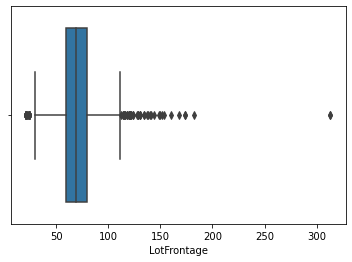

In [17]:
#checking for outliers using boxplot
sns.boxplot(housing_df.LotFrontage)
plt.show()

In [18]:
housing_df.LotFrontage = housing_df.LotFrontage.fillna(housing_df.LotFrontage.median())

In [19]:
round(100*(housing_df.isnull().sum()/len(housing_df.index)),2).sort_values(ascending=False)

GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
YearBuilt        0.00
ExterQual        0.00
ExterCond        0.00
Exterior2nd      0.00
Exterior1st      0.00
Foundation       0.00
BsmtFinSF1       0.00
RoofMatl         0.00
RoofStyle        0.00
YearRemodAdd     0.00
SalePrice        0.00
OverallCond      0.00
Utilities        0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
LotConfig        0.00
OverallQual      0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
BsmtFinSF2       0.00
HouseStyle       0.00
Heating          0.00
BsmtUnfSF        0.00
EnclosedPorch    0.00
FireplaceQu      0.00
GarageCars

In [20]:
#checking null values
NA_features = housing_df.isnull().sum()
#find out columns which have nulls
NA_features = NA_features[NA_features > 0]
#columns & percentage of values missing
print(round(100*NA_features[NA_features > 0]/len(housing_df),2).sort_values(ascending=False))

GarageCond      5.55
GarageQual      5.55
GarageFinish    5.55
GarageYrBlt     5.55
GarageType      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64


In [21]:
import datetime as d
current_year = int(d.datetime.now().year)
current_year

2021

In [22]:
# Calculate the age of constrution from year
housing_df['YearBuilt'] = current_year - housing_df['YearBuilt']
housing_df['YearRemodAdd'] = current_year - housing_df['YearRemodAdd']
housing_df['GarageYrBlt'] = current_year - housing_df['GarageYrBlt']
housing_df['YrSold'] = current_year - housing_df['YrSold']

In [23]:
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].mean())

In [24]:
housing_df.GarageCond = housing_df.GarageCond.fillna('NA')

In [25]:
housing_df.GarageQual = housing_df.GarageQual.fillna('NA')
housing_df.GarageFinish = housing_df.GarageFinish.fillna('NA')
housing_df.GarageType = housing_df.GarageType.fillna('NA')

In [26]:
#checking null values
NA_features = housing_df.isnull().sum()
#find out columns which have nulls
NA_features = NA_features[NA_features > 0]
#columns & percentage of values missing
print(round(100*NA_features[NA_features > 0]/len(housing_df),2).sort_values(ascending=False))

BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64


In [27]:
housing_df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [28]:
# fill all the nan values with 'NA'
housing_df.BsmtFinType2 = housing_df.BsmtFinType2.fillna('NA')
housing_df.BsmtExposure = housing_df.BsmtExposure.fillna('NA')
housing_df.BsmtFinType1 = housing_df.BsmtFinType1.fillna('NA')
housing_df.BsmtCond = housing_df.BsmtCond.fillna('NA')
housing_df.BsmtQual = housing_df.BsmtQual.fillna('NA')

In [29]:
#checking null values
NA_features = housing_df.isnull().sum()
#find out columns which have nulls
NA_features = NA_features[NA_features > 0]
#columns & percentage of values missing
print(round(100*NA_features[NA_features > 0]/len(housing_df),2).sort_values(ascending=False))

MasVnrArea    0.55
MasVnrType    0.55
Electrical    0.07
dtype: float64


In [30]:
housing_df.MasVnrArea.isnull().sum()

8

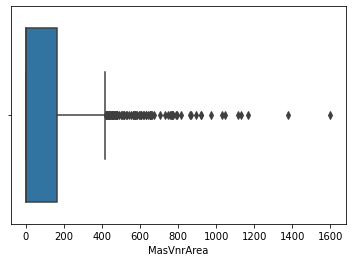

In [31]:
sns.boxplot(housing_df.MasVnrArea)
plt.show()

In [32]:
housing_df.MasVnrArea = housing_df.MasVnrArea.fillna(housing_df.MasVnrArea.median())

In [33]:
housing_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [34]:
housing_df.MasVnrType = housing_df.MasVnrType.replace(np.nan,'None')

In [35]:

housing_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
housing_df.Electrical = housing_df.Electrical.replace(np.nan,'SBrkr')

In [37]:
#checking null values
NA_features = housing_df.isnull().sum()
#find out columns which have nulls
NA_features = NA_features[NA_features > 0]
#columns & percentage of values missing
print(round(100*NA_features[NA_features > 0]/len(housing_df),2).sort_values(ascending=False))

Series([], dtype: float64)


In [38]:
housing_df.shape

(1460, 76)

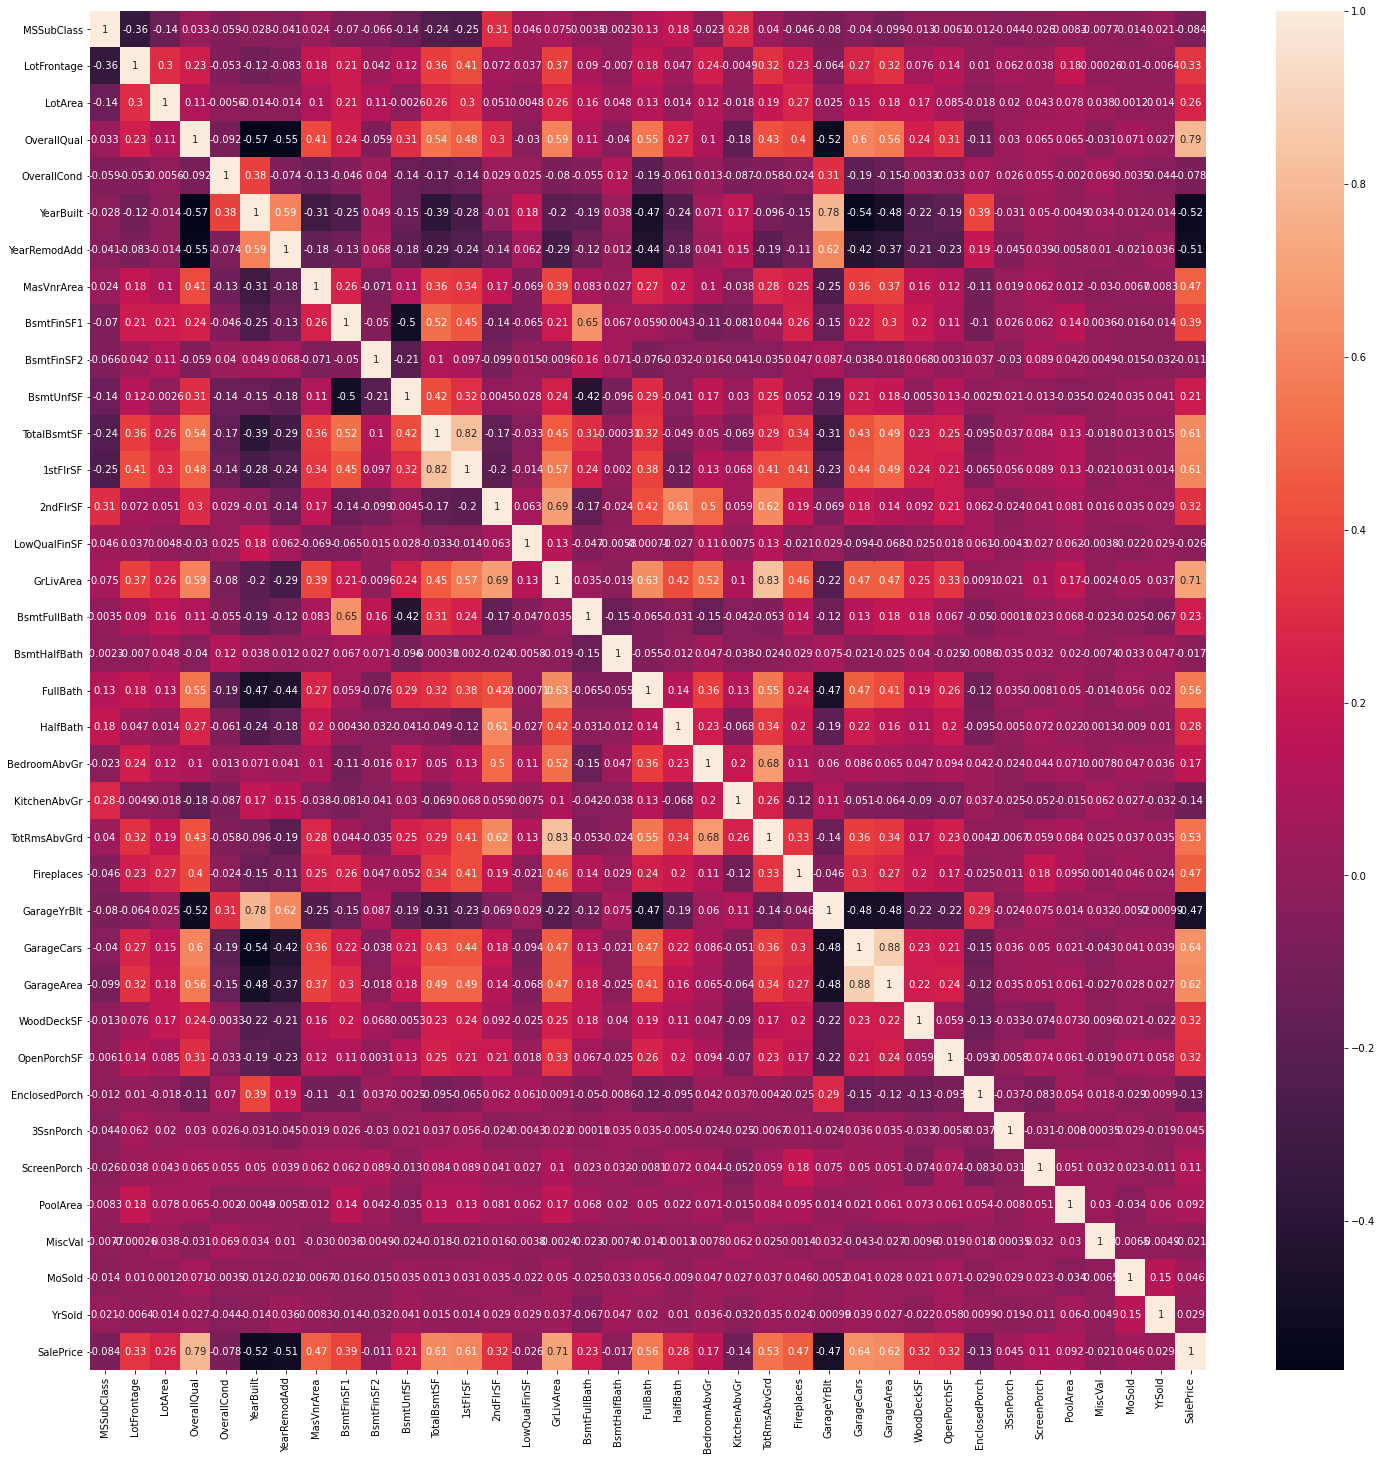

In [39]:
#heatmap with corr
plt.figure(figsize=(25,25))
sns.heatmap(housing_df.corr(),annot=True)
plt.show()

In [40]:
housing_df.corr()*100

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,100.000000,-35.671753,-13.978108,3.262771,-5.931582,-2.785014,-4.058104,2.357297,-6.983575,-6.564858,-14.075948,-23.851841,-25.175835,30.788572,4.647376,7.485318,0.349103,-0.233253,13.160822,17.735439,-2.343803,28.172104,4.038006,-4.556934,-8.018726,-4.010979,-9.867154,-1.257936,-0.610012,-1.203662,-4.382455,-2.603018,0.828271,-0.768329,-1.358464,2.140704,-8.428414
LotFrontage,-35.671753,100.000000,30.452217,23.481226,-5.328067,-11.668539,-8.334809,17.846857,21.436661,4.246323,12.409821,36.347231,41.377253,7.238802,3.746931,36.800744,9.034287,-0.697899,18.053379,4.722164,23.684003,-0.490467,32.051766,23.322064,-6.437009,26.953925,32.351093,7.554211,13.701356,1.028721,6.194523,3.765508,18.081858,-0.025536,1.045068,-0.638043,33.477085
LotArea,-13.978108,30.452217,100.000000,10.580574,-0.563627,-1.422765,-1.378843,10.332051,21.410313,11.116975,-0.261836,26.083313,29.947458,5.098595,0.477897,26.311617,15.815453,4.804557,12.603063,1.425947,11.968991,-1.778387,19.001478,27.136401,2.481205,15.487074,18.040276,17.169769,8.477381,-1.833973,2.042283,4.316038,7.767239,3.806769,0.120499,1.426141,26.384335
OverallQual,3.262771,23.481226,10.580574,100.000000,-9.193234,-57.232277,-55.068392,40.725212,23.966597,-5.911869,30.815893,53.780850,47.622383,29.549288,-3.042928,59.300743,11.109779,-4.015016,55.059971,27.345810,10.167636,-18.388223,42.745234,39.676504,-51.801821,60.067072,56.202176,23.892339,30.881882,-11.393686,3.037057,6.488636,6.516584,-3.140621,7.081517,2.734671,79.098160
OverallCond,-5.931582,-5.328067,-0.563627,-9.193234,100.000000,37.598320,-7.374150,-12.569363,-4.623086,4.022917,-13.684057,-17.109751,-14.420278,2.894212,2.549432,-7.968587,-5.494152,11.782092,-19.414949,-6.076933,1.298006,-8.700086,-5.758317,-2.381998,30.616876,-18.575751,-15.152137,-0.333370,-3.258881,7.035618,2.550366,5.481053,-0.198494,6.877681,-0.351084,-4.394975,-7.785589
YearBuilt,-2.785014,-11.668539,-1.422765,-57.232277,37.598320,100.000000,59.285498,-31.160011,-24.950320,4.910683,-14.904039,-39.145200,-28.198586,-1.030766,18.378434,-19.900971,-18.759855,3.816181,-46.827079,-24.265591,7.065122,17.480025,-9.558913,-14.771640,78.055499,-53.785009,-47.895382,-22.488014,-18.868584,38.726778,-3.135451,5.036443,-0.494973,3.438314,-1.239847,-1.361768,-52.289733
YearRemodAdd,-4.058104,-8.334809,-1.378843,-55.068392,-7.374150,59.285498,100.000000,-17.652918,-12.845055,6.775851,-18.113309,-29.106558,-24.037927,-14.002378,6.241910,-28.738852,-11.946988,1.233703,-43.904648,-18.333061,4.058093,14.959752,-19.173982,-11.258132,61.812984,-42.062215,-37.159981,-20.572592,-22.629763,19.391915,-4.528581,3.874001,-0.582937,1.028625,-2.149000,3.574325,-50.710097
MasVnrArea,2.357297,17.846857,10.332051,40.725212,-12.569363,-31.160011,-17.652918,100.000000,26.125605,-7.132963,11.386216,36.006737,33.985041,17.380000,-6.862798,38.805205,8.301005,2.740266,27.299886,19.910752,10.277452,-3.845011,27.956789,24.701528,-24.617754,36.194457,37.088415,15.999053,12.252833,-10.990680,1.914378,6.224771,1.192839,-2.951225,-0.672320,0.831662,47.261450
BsmtFinSF1,-6.983575,21.436661,21.410313,23.966597,-4.623086,-24.950320,-12.845055,26.125605,100.000000,-5.011740,-49.525147,52.239605,44.586266,-13.707899,-6.450260,20.817113,64.921175,6.741848,5.854314,0.426242,-10.735468,-8.100685,4.431562,26.001092,-15.033789,22.405352,29.697039,20.430615,11.176061,-10.230331,2.645051,6.202062,14.049129,0.357147,-1.572695,-1.435892,38.641981
BsmtFinSF2,-6.564858,4.246323,11.116975,-5.911869,4.022917,4.910683,6.775851,-7.132963,-5.011740,100.000000,-20.929449,10.480954,9.711745,-9.926032,1.480700,-0.9

In [41]:
#segregating list of categorical and numerical columns
housing_cat = []
housing_num = []

for col in list(housing_df):
    if housing_df[col].dtypes == 'object':
        housing_cat.append(col)  
    else:
        housing_num.append(col)
print('**Categorical columns:**\n',housing_cat)
print("\n")
print('**Numerical columns:**\n',housing_num)

**Categorical columns:**
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


**Numerical columns:**
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'

In [42]:
housing_df_dummy = pd.get_dummies(housing_df[housing_cat], drop_first=True)

In [43]:
housing_df_concat = pd.concat([housing_df, housing_df_dummy], axis=1)
housing_df_concat.shape

(1460, 286)

In [44]:
housing_df_final = housing_df_concat.drop(housing_cat,axis=1)

In [45]:
housing_df_final.shape

(1460, 247)

### Train-Test Split

In [46]:
# Prepare X & y for train & test
X = housing_df_final.drop('SalePrice',axis=1)
y = housing_df_final['SalePrice']

In [47]:
# scale the data
from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=246)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1022, 246)
X_test Shape: (438, 246)
y_train Shape: (1022,)
y_test Shape: (438,)


In [49]:
scaler = StandardScaler()

In [50]:
housing_num1 = housing_num.copy()
housing_num1.remove('SalePrice')

In [51]:
X_train[housing_num1] = scaler.fit_transform(X_train[housing_num1])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657427,-0.116296,-0.473943,-0.780717,0.383810,1.525951,1.695468,-0.557667,0.042644,-0.293157,-0.373789,-0.431237,-0.765

In [52]:
X_test[housing_num1] = scaler.transform(X_test[housing_num1])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888556,-0.433482,-0.144205,-1.495676,0.383810,0.009099,0.676735,-0.557667,0.361157,-0.293157,-0.703903,-0.431237,-0.76

### Model Building

### 1. Ridge Regularization

In [53]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008305,0.001254,0.003828,0.000754,0.0001,{'alpha': 0.0001},0.862027,0.565812,0.707837,0.277557,0.880828,0.658812,0.222259,28,0.955237,0.951411,0.952754,0.952697,0.954861,0.953392,0.001441
1,0.007414,0.000794,0.003587,0.000492,0.001,{'alpha': 0.001},0.862033,0.565817,0.707855,0.277693,0.880832,0.658846,0.222215,27,0.955237,0.951411,0.952754,0.952697,0.954861,0.953392,0.001441
2,0.008601,0.003774,0.003799,0.000749,0.01,{'alpha': 0.01},0.862090,0.565870,0.708031,0.279045,0.880864,0.659180,0.221771,26,0.955237,0.951411,0.952754,0.952697,0.954861,0.953392,0.001441
3,0.008045,0.000076,0.002803,0.000240,0.05,{'alpha': 0.05},0.862339,0.566094,0.708805,0.284996,0.881007,0.660648,0.219823,25,0.955236,0.951410,0.952752,0.952696,0.954859,0.953391,0.001440
4,0.007201,0.000748,0.003598,0.000490,0.1,{'alpha': 0.1},0.862636,0.566352,0.709749,0.292300,0.881178,0.662443,0.217439,24,0.955232,0.951409,0.952748,0.952692,0.954855,0.953387,0.001440


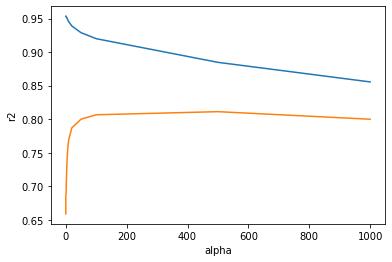

In [55]:
#PLot the graph alpha vs r2
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.show()

In [56]:
print(model_cv.best_estimator_)
print(model_cv.best_score_)
print(model_cv.best_params_)

Ridge(alpha=500)
0.8111864347463144
{'alpha': 500}


In [57]:
# Best alpha value
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.79254080e+03,  6.37401293e+02,  2.80003272e+03,  8.66683744e+03,
        2.78402904e+03, -1.83785024e+03, -3.05770650e+03,  3.89112781e+03,
        2.57722172e+03,  7.63965453e+02,  9.93384110e+02,  3.86599818e+03,
        5.48219314e+03,  5.05525756e+03, -4.54997434e+02,  8.19599910e+03,
        2.52400422e+03,  1.51907712e+02,  3.92838025e+03,  1.99790189e+03,
        2.75657135e+02, -1.87240268e+03,  4.30352526e+03,  2.89696282e+03,
       -1.03022426e+03,  4.55765999e+03,  3.33184808e+03,  1.91355127e+03,
        1.08239847e+03,  3.76929764e+01,  9.33817092e+02,  1.07981920e+03,
        1.84657174e+02,  2.76783007e+00, -2.10142584e+02,  4.59835566e+02,
        7.12364543e+02,  1.74829529e+02,  1.23218722e+03, -8.96561172e+02,
        8.54572856e+02,  3.93728345e+02, -2.22465725e+03, -3.71426094e+02,
        1.43716611e+03,  4.96171149e+02,  1.53557350e+03, -8.34852149e+02,
        2.12702206e+03, -1.14646182e+03, -4.82333545e+02, -3.20378414e+02,
        7.13062006e+02,  

In [58]:
from sklearn import metrics

In [59]:
# R2 score
y_train_pred = ridge.predict(X_train)
print('The Train accuracy using Ridge is:')
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('The Test accuracy using Ridge is:')
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

The Train accuracy using Ridge is:
0.8836116198063151
The Test accuracy using Ridge is:
0.8560275120601331


In [60]:
# print the model coefficient
cols = X.columns
cols = cols.insert(0,"constant")
model_parameters = list(ridge.coef_)
list(zip(cols,model_parameters))

[('constant', -2792.5407978438357),
 ('MSSubClass', 637.4012931868658),
 ('LotFrontage', 2800.0327184459525),
 ('LotArea', 8666.83743680321),
 ('OverallQual', 2784.0290383338534),
 ('OverallCond', -1837.8502431799984),
 ('YearBuilt', -3057.706497720162),
 ('YearRemodAdd', 3891.1278077369134),
 ('MasVnrArea', 2577.2217243011605),
 ('BsmtFinSF1', 763.9654531346434),
 ('BsmtFinSF2', 993.3841097498206),
 ('BsmtUnfSF', 3865.998183962694),
 ('TotalBsmtSF', 5482.1931378674835),
 ('1stFlrSF', 5055.257562802728),
 ('2ndFlrSF', -454.99743372138903),
 ('LowQualFinSF', 8195.999096012923),
 ('GrLivArea', 2524.0042178366575),
 ('BsmtFullBath', 151.90771237932813),
 ('BsmtHalfBath', 3928.3802498412765),
 ('FullBath', 1997.9018917024305),
 ('HalfBath', 275.65713549648257),
 ('BedroomAbvGr', -1872.4026827273053),
 ('KitchenAbvGr', 4303.525261557745),
 ('TotRmsAbvGrd', 2896.962820082042),
 ('Fireplaces', -1030.2242562000354),
 ('GarageYrBlt', 4557.659988296483),
 ('GarageCars', 3331.848084728126),
 ('Ga

#### Doubling the alpha value


In [61]:
# double the alpha for Ridge
alpha_double = 1000
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train, y_train)
ridge_double.coef_

array([-2.07081414e+03,  1.19210394e+03,  2.30354762e+03,  7.11188042e+03,
        2.00100058e+03, -1.60401891e+03, -2.75053709e+03,  3.58009895e+03,
        2.64906399e+03,  5.76780589e+02,  9.47416481e+02,  3.82419101e+03,
        4.85642160e+03,  3.84631344e+03, -2.97181394e+02,  6.75284393e+03,
        2.12616876e+03,  1.08085630e+02,  3.45400720e+03,  1.98687518e+03,
        6.95091655e+02, -1.43431438e+03,  4.11720028e+03,  2.91859402e+03,
       -1.27824011e+03,  3.92741928e+03,  3.48347717e+03,  2.00401283e+03,
        1.21534366e+03, -5.22313716e+00,  7.45225734e+02,  9.74762884e+02,
        3.33452513e+02, -1.82726316e+01, -1.11671271e+02,  3.27522528e+02,
        5.31192317e+02,  9.02424782e+01,  1.12050022e+03, -1.06534309e+03,
        6.32091938e+02,  4.65406723e+02, -1.70143117e+03, -7.00803323e+02,
        1.10633182e+03,  4.55860940e+02,  8.36197447e+02, -7.04385722e+02,
        1.73468794e+03, -8.49443310e+02, -3.47270577e+02, -3.07157336e+02,
        5.92431718e+02,  

In [62]:
# train prediction when alpha is doubled
y_train_pred_double = ridge_double.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred_double))

0.8586632775400489


In [63]:
# test prediction when alpha is doubled
y_test_pred_double = ridge_double.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred_double))

0.8414372885389518


In [64]:
cols = X.columns
cols = cols.insert(0,"constant")
model_parameters = list(ridge_double.coef_)
ridge_double_list = list(zip(cols,model_parameters))

In [65]:
ridge_double_list

[('constant', -2070.814139007073),
 ('MSSubClass', 1192.1039436740557),
 ('LotFrontage', 2303.547621120331),
 ('LotArea', 7111.88041752908),
 ('OverallQual', 2001.0005831273259),
 ('OverallCond', -1604.0189052639246),
 ('YearBuilt', -2750.5370880566825),
 ('YearRemodAdd', 3580.098945771553),
 ('MasVnrArea', 2649.063989425801),
 ('BsmtFinSF1', 576.7805889518106),
 ('BsmtFinSF2', 947.4164812048494),
 ('BsmtUnfSF', 3824.1910088582113),
 ('TotalBsmtSF', 4856.421604589),
 ('1stFlrSF', 3846.313435756035),
 ('2ndFlrSF', -297.18139439027243),
 ('LowQualFinSF', 6752.843926511468),
 ('GrLivArea', 2126.1687646307555),
 ('BsmtFullBath', 108.08563016286752),
 ('BsmtHalfBath', 3454.0071967265903),
 ('FullBath', 1986.875179483245),
 ('HalfBath', 695.0916553115176),
 ('BedroomAbvGr', -1434.31438263978),
 ('KitchenAbvGr', 4117.2002763587125),
 ('TotRmsAbvGrd', 2918.5940157684904),
 ('Fireplaces', -1278.2401063107923),
 ('GarageYrBlt', 3927.4192818323277),
 ('GarageCars', 3483.477170672431),
 ('GarageAr

### 2. Lasso Regularization

In [66]:
# cross validation
folds = 5

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# grid search
# lasso model
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   17.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [67]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.133046,0.008408,0.003200,0.000979,0.0001,{'alpha': 0.0001},0.862162,0.557875,0.704952,0.280302,0.880350,0.657128,0.221812,28,0.955237,0.951408,0.952754,0.952697,0.954861,0.953391,0.001441
1,0.127209,0.007221,0.003597,0.000490,0.001,{'alpha': 0.001},0.862163,0.557885,0.704968,0.280300,0.880350,0.657133,0.221813,27,0.955237,0.951408,0.952754,0.952697,0.954861,0.953391,0.001441
2,0.130323,0.005463,0.003194,0.000402,0.01,{'alpha': 0.01},0.862168,0.557987,0.705127,0.280277,0.880347,0.657181,0.221819,26,0.955237,0.951408,0.952754,0.952697,0.954861,0.953391,0.001441
3,0.128889,0.008089,0.003818,0.000748,0.05,{'alpha': 0.05},0.862191,0.558437,0.705831,0.280169,0.880332,0.657392,0.221847,25,0.955237,0.951408,0.952754,0.952697,0.954861,0.953391,0.001442
4,0.130222,0.010424,0.003095,0.000207,0.1,{'alpha': 0.1},0.862221,0.559007,0.706698,0.280025,0.880308,0.657652,0.221884,24,0.955237,0.951407,0.952754,0.952697,0.954861,0.953391,0.001442


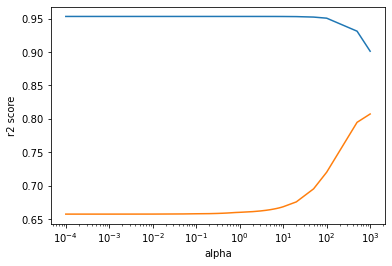

In [68]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [69]:
#checking the value of optimum number of parameters
print(model_cv.best_estimator_)
print(model_cv.best_params_)
print(model_cv.best_score_)

Lasso(alpha=1000)
{'alpha': 1000}
0.8071885019572269


In [70]:
# model with optimal alpha
# lasso regression
lasso = Lasso(alpha=1000)
lasso.fit(X_train, y_train)

# predict
y_train_pred = lasso.predict(X_train)
print('The Train accuracy using Lasso is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print('The Test accuracy using Lasso is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The Train accuracy using Lasso is:
0.8924324938424294
The Test accuracy using Lasso is:
0.8411619521139241


In [71]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180272.21),
 ('MSSubClass', -6370.312),
 ('LotFrontage', -0.0),
 ('LotArea', 3437.84),
 ('OverallQual', 16743.628),
 ('OverallCond', 3284.413),
 ('YearBuilt', -5499.857),
 ('YearRemodAdd', -3773.917),
 ('MasVnrArea', 1937.156),
 ('BsmtFinSF1', 213.062),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 2789.143),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -1277.512),
 ('GrLivArea', 27581.124),
 ('BsmtFullBath', 3986.702),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 1642.333),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -9.622),
 ('KitchenAbvGr', -2141.972),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 781.698),
 ('GarageYrBlt', -234.314),
 ('GarageCars', 6845.151),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 905.489),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 438.782),
 ('PoolArea', -175.092),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('YrSold', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 682.028),
 ('

#### Doubling the alpha value


In [72]:
# double the alpha value
lasso_double = Lasso(alpha=2000)
lasso_double.fit(X_train, y_train)

# predict
y_train_pred_double = lasso_double.predict(X_train)
print('The training accuracy after doubling the alpha is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred = lasso_double.predict(X_test)
print('The test accuracy after doubling the alpha is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))

The training accuracy after doubling the alpha is:
0.8659772119754574
The test accuracy after doubling the alpha is:
0.8414372885389518


In [73]:
# model coefficients
model_parameters = list(sorted(lasso_double.coef_))
model_parameters.insert(0, lasso_double.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_double_list = list(zip(cols, model_parameters))

In [74]:
lasso_double_list

[('constant', 180088.524),
 ('MSSubClass', -8438.123),
 ('LotFrontage', -5639.613),
 ('LotArea', -4572.28),
 ('OverallQual', -4070.91),
 ('OverallCond', -2883.297),
 ('YearBuilt', -2701.209),
 ('YearRemodAdd', -2436.353),
 ('MasVnrArea', -1297.047),
 ('BsmtFinSF1', -1242.759),
 ('BsmtFinSF2', -1176.333),
 ('BsmtUnfSF', -1123.272),
 ('TotalBsmtSF', -1023.063),
 ('1stFlrSF', -980.09),
 ('2ndFlrSF', -714.936),
 ('LowQualFinSF', -638.444),
 ('GrLivArea', -606.15),
 ('BsmtFullBath', -406.704),
 ('BsmtHalfBath', -380.226),
 ('FullBath', -370.522),
 ('HalfBath', -217.17),
 ('BedroomAbvGr', -77.087),
 ('KitchenAbvGr', -68.959),
 ('TotRmsAbvGrd', -34.121),
 ('Fireplaces', -19.979),
 ('GarageYrBlt', -13.866),
 ('GarageCars', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZon

### Remove top 5 Contributors from Lasso

In [75]:
#drop columns from train data
X_train_drop = X_train.drop(['SaleCondition_Partial','SaleCondition_Normal','SaleCondition_Family','SaleCondition_Alloca','SaleCondition_AdjLand'], axis=1)

In [76]:
#drop columns from test data
X_test_drop = X_test.drop(['SaleCondition_Partial','SaleCondition_Normal','SaleCondition_Family','SaleCondition_Alloca','SaleCondition_AdjLand'],axis=1)

In [77]:
model_cv.fit(X_train_drop,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [78]:
cv_lasso_results_drop = pd.DataFrame(model_cv.cv_results_)

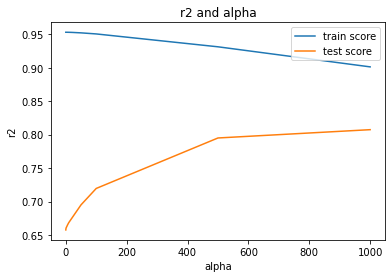

In [79]:
# plotting mean test and train scoes with alpha 
cv_lasso_results_drop['param_alpha'] = cv_lasso_results_drop['param_alpha'].astype('float32')

# plotting
plt.plot(cv_lasso_results_drop['param_alpha'], cv_lasso_results_drop['mean_train_score'])
plt.plot(cv_lasso_results_drop['param_alpha'], cv_lasso_results_drop['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [80]:
# best values of alpha & score
print(model_cv.best_estimator_)
print(model_cv.best_score_)
print(model_cv.best_params_)

Lasso(alpha=1000)
0.8073699997235518
{'alpha': 1000}


In [81]:
#using best alpha value
alpha_lasso =1000

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_drop, y_train) 

Lasso(alpha=1000)

In [82]:
lasso = Lasso(alpha=1000)
lasso.fit(X_train_drop, y_train)

# predict
y_train_pred = lasso.predict(X_train_drop)
print('The train accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test_drop)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The train accuracy is:
0.8924324938424294
The test accuracy is:
0.8411619521139241


In [83]:
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_drop_list = list(zip(cols, model_parameters))

In [84]:
lasso_drop_list

[('constant', 180272.21),
 ('MSSubClass', -10626.092),
 ('LotFrontage', -6695.175),
 ('LotArea', -6370.312),
 ('OverallQual', -5725.693),
 ('OverallCond', -5499.857),
 ('YearBuilt', -4719.551),
 ('YearRemodAdd', -3773.917),
 ('MasVnrArea', -3559.46),
 ('BsmtFinSF1', -2884.129),
 ('BsmtFinSF2', -2378.469),
 ('BsmtUnfSF', -2288.256),
 ('TotalBsmtSF', -2141.972),
 ('1stFlrSF', -2012.262),
 ('2ndFlrSF', -1677.185),
 ('LowQualFinSF', -1626.404),
 ('GrLivArea', -1367.542),
 ('BsmtFullBath', -1341.186),
 ('BsmtHalfBath', -1277.512),
 ('FullBath', -1250.81),
 ('HalfBath', -1168.916),
 ('BedroomAbvGr', -1164.578),
 ('KitchenAbvGr', -946.918),
 ('TotRmsAbvGrd', -863.794),
 ('Fireplaces', -790.732),
 ('GarageYrBlt', -709.486),
 ('GarageCars', -697.654),
 ('GarageArea', -656.193),
 ('WoodDeckSF', -621.154),
 ('OpenPorchSF', -522.43),
 ('EnclosedPorch', -456.596),
 ('3SsnPorch', -453.187),
 ('ScreenPorch', -402.776),
 ('PoolArea', -385.228),
 ('MiscVal', -362.683),
 ('MoSold', -311.699),
 ('YrSold'